# Домашнее задание

1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [5]:
iris = load_iris()

In [7]:
# посмотрим описание данных
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [76]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
variety = iris.target

In [32]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### деление данных для обучения и тестирования

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

###  модель lda

In [80]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [81]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

Сделаем визуализацию на тестовой выборке

In [82]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1,
       0, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0])

Оценим точность получившейся модель

In [83]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

1.0

In [84]:
# коэффициент дискриминантных линий
lda.coef_

array([[  7.5220515 ,  13.31955705, -17.24539147, -21.34171747],
       [ -1.23918616,  -4.36467186,   3.4165903 ,   2.33841257],
       [ -5.11950886,  -7.10663612,  11.21779192,  15.58773485]])

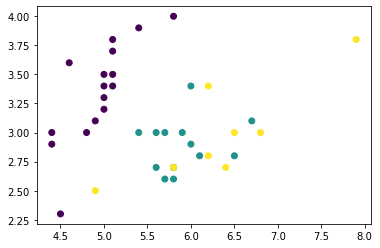

In [85]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=y_test)
plt.show()

### визуализация без целевой переменной для тестовой выборки

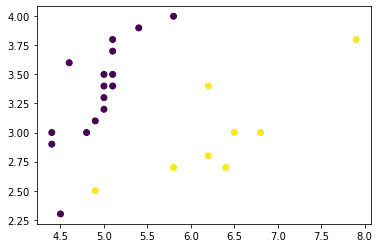

In [86]:
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
plt.scatter(small_test['sepal length (cm)'], small_test['sepal width (cm)'], c=sy_test)
plt.show()

Теперь приступим к визуализации с центрами

In [87]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [88]:
# посмотрим на наши центроиды
lda_small.means_

array([[5.03235294, 3.46470588],
       [6.65609756, 2.97804878]])

### визуализация c целевой переменной

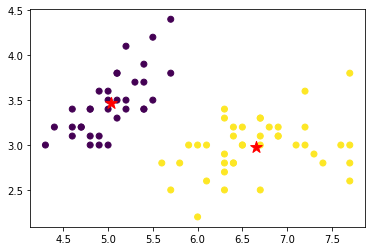

In [89]:
# сам scatter plot
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
# центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

### подбор оптимального числа кластеров

In [91]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)

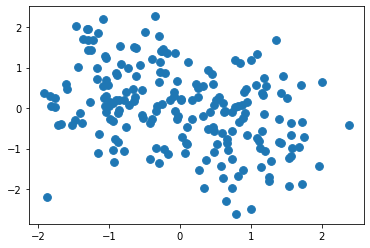

In [92]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [93]:
# импортируем kmeans
from sklearn.cluster import KMeans

In [94]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

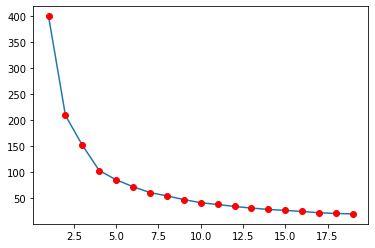

In [95]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Из графика можно сделать вывод, что оптимальное число для кол-ва кластеров будет 2 или 3, теперь можем визулизировать это

### посмотрим картину с 3мя классами

In [98]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 0, 1, 0, 0, 2, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 2, 0,
       2, 1, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 2,
       1, 1, 0, 0, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 0, 1, 1, 0, 1,
       1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 1,
       1, 2, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 0, 0, 2,
       0, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0,
       0, 1])

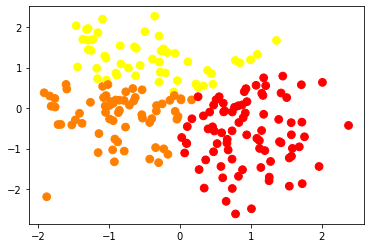

In [99]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

### посмотрим картину с 2мя классами

In [100]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0])

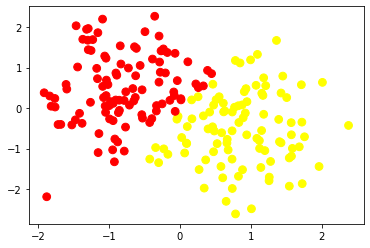

In [101]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

На мой взгляд оптимальнее взять 2 кластера для анализа, чем 2, т к при 3ёх кластеров взаимосвязь очень сильная и не всегла будет понятно к какому кластеру отнести данные